# Artificial Neural Network


***ABSTRACT***

***This is a hands-on practice of building an Artificial Neural Network (ANN) with Keras/Tensorflow to train the Churn_Modelling Dataset. We load the dataset and pre-process the data with [Label Encoder/One-hot Encoder](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621), and then use StandardScaler to scale the data. We then build an Artificial Neural Network (ANN) with Keras library with two hidden layers, train it and evaluate the results.***

## 1. Churn_Modelling Dataset

The Churn Modelling dataset contains customers information of a bank with a flag that s/he exits from the bank within 6 months. We will build an ANN to learn from the dataset and predict if a customer will leave the bank or not


### 1.1 Importing the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Hide warnings
warnings.filterwarnings('ignore')

datafile = 'https://raw.githubusercontent.com/jchen8000/MachineLearning/master/Artificial%20Neural%20Network/data/Churn_Modelling.csv'
dataset = pd.read_csv(datafile)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


### 1.2 Encoding categorical data and Feature Scaling

Encode the country name (string) to 0, 1, 2 etc. 
Encode female/male (string) to 0, 1

Also need One Hot Encoding, see [Label Encoder vs. One Hot Encoder](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621)

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (OneHotEncoder(),[1,2]),
    (StandardScaler(),[0,3,4,5,6,7,8,9])
    #(MinMaxScaler(feature_range=(0, 1)),[0,3,4,5,6,7,8,9])
)

X = preprocess.fit_transform(X)

# Add a bias column, this is proved to be able to increase the accuracy
m = X.shape[0]
X = np.hstack((np.ones((m,1)), X))

In [0]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.preprocessing import StandardScaler

# labelencoder_X_1 = LabelEncoder()
# X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
# labelencoder_X_2 = LabelEncoder()
# X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

# onehotencoder = OneHotEncoder(categorical_features = [1])
# X = onehotencoder.fit_transform(X).toarray()
# X = X[:, 1:]

# sc = StandardScaler()
# X = sc.fit_transform(X)

### 1.3 Splitting the dataset into the Training set and Test set


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 1.4 Feature Scaling

In [6]:
print( X_train.shape )
print( X_test.shape )
#print( X_train[0:10,:])


(7500, 14)
(2500, 14)


## 2. Build Artificial Neural Network

### 2.1 Build ANN
the input layer and the first hidden layer

*   Input layer = 11 features based on the dataset
*   First Hidden layer = 6, Rectified Linear Units (ReLU) function
*   Second Hidden layer = 6, Rectified Linear Units (ReLU) function
*   Output Layer = 1, using sigmoid function






In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
classifier.add(Dropout(rate = 0.2)) # To improve the ANN, dropout Regularization to reduce overfitting if needed


classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.2))   # To improve the ANN, dropout Regularization to reduce overfitting if needed

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### 2.2 Compiling the ANN

In [0]:
classifier.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy']
                  )

### 2.3 Fitting the ANN to the Training set

In [9]:
history = classifier.fit(X_train, y_train, 
                         batch_size = 16, 
                         epochs = 100, 
                         validation_data=(X_test, y_test)
                        )

Instructions for updating:
Use tf.cast instead.
Train on 7500 samples, validate on 2500 samples
Epoch 1/100
7500/7500 [==============================] - 1s 121us/step - loss: 0.4824 - acc: 0.7991 - val_loss: 0.4172 - val_acc: 0.8164
Epoch 2/100
7500/7500 [==============================] - 1s 83us/step - loss: 0.4184 - acc: 0.8285 - val_loss: 0.3746 - val_acc: 0.8508
Epoch 3/100
7500/7500 [==============================] - 1s 83us/step - loss: 0.3862 - acc: 0.8420 - val_loss: 0.3595 - val_acc: 0.8496
Epoch 4/100
7500/7500 [==============================] - 1s 87us/step - loss: 0.3818 - acc: 0.8444 - val_loss: 0.3504 - val_acc: 0.8596
Epoch 5/100
7500/7500 [==============================] - 1s 98us/step - loss: 0.3766 - acc: 0.8435 - val_loss: 0.3535 - val_acc: 0.8608
Epoch 6/100
7500/7500 [==============================] - 1s 96us/step - loss: 0.3775 - acc: 0.8472 - val_loss: 0.3496 - val_acc: 0.8584
Epoch 7/100
7500/7500 [==============================] - 1s 97us/step - loss: 0.3764 - 

In [10]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


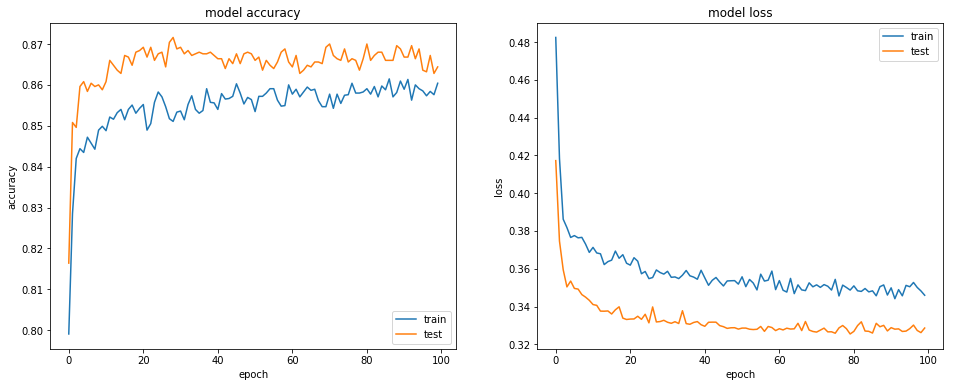

In [11]:
fig = plt.figure(1, figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('model accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')



plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

### 2.4 Making predictions and evaluating the model with test set

In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
accuracy_score = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:\n", accuracy_score)
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[1915   76]
 [ 263  246]]
Accuracy Score:
 0.8644
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.76      0.48      0.59       509

   micro avg       0.86      0.86      0.86      2500
   macro avg       0.82      0.72      0.76      2500
weighted avg       0.86      0.86      0.85      2500



### 2.5 Predicting a single new observation

Predict if the customer with the following informations will leave the bank:

*   Credit Score: 600
*   Geography: France
*   Gender: Male
*   Age: 40
*   Tenure: 3
*   Balance: 60000
*   Number of Products: 2
*   Has Credit Card: Yes
*   Is Active Member: Yes
*   Estimated Salary: 50000



In [14]:
# Create a new record based on the original dataset
X_new_single = dataset.iloc[0:1, 3:13].values
X_new_single[0,0] = 600
X_new_single[0,1] = 'France'
X_new_single[0,2] = 'Male'
X_new_single[0,3] = 40
X_new_single[0,4] = 3
X_new_single[0,5] = 60000
X_new_single[0,6] = 2
X_new_single[0,7] = 1
X_new_single[0,8] = 1
X_new_single[0,9] = 50000

# Append the new record to the original full dataset, this is because we can use the previous preprocess model to process whole dataset
X_new = dataset.iloc[:, 3:13].values
X_new = np.concatenate((X_new, X_new_single),axis=0)

# Add bias column
m = X_new.shape[0]
X_new = preprocess.fit_transform(X_new)
X_new = np.hstack((np.ones((m,1)), X_new))

# Predict the new record -- very last record in the dataset -- using the already trained ANN model
y_new_single = classifier.predict(X_new[m-1].reshape(1,X_new.shape[1])) 
y_new_single = (y_new_single>0.5)
print("Will the new customer likely to exit the bank? ", y_new_single[0,0], " -- with probability of", accuracy_score )

Will the new customer likely to exit the bank?  False  -- with probability of 0.8644


## 3. Evaluating the ANN

Note: Do not run Section 2. I.e. run Section 1 to prepare the data, skip Section 2, and Run this section.

In [0]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from keras.models import Sequential
# from keras.layers import Dense


In [0]:
# def build_classifier():
#     classifier = Sequential()
#     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
#     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#     classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier
  
# classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
# mean = accuracies.mean()
# variance = accuracies.std()


## 4. Tuning the Artificial Neural Network
Find out the best parameters for the ANN

Note: Do not run Section 2 and 3. (I.e. run Section 1 to prepare the data, skip Section 2 and 3, then Run this section.)

In [0]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from keras.models import Sequential
# from keras.layers import Dense


# def build_classifier(optimizer,units):
#     classifier = Sequential()
#     classifier.add(Dense(units = units, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
#     classifier.add(Dense(units = units, kernel_initializer = 'uniform', activation = 'relu'))
#     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier
  
# classifier = KerasClassifier(build_fn = build_classifier)
# parameters = {'batch_size': [8, 16],
#               'epochs': [100, 500],
#               'optimizer': ['adam', 'rmsprop'],
#               'units': [6,12,18]}

# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10)

In [0]:
# grid_search = grid_search.fit(X_train, y_train)

# best_parameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_

# print(best_parameters)
# print(best_accuracy)